In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Exercise Set 12: Peer effects 


In this Exercise Set 12 we will investigate peer effects data. 

## 12.1: Roommate peer effects


<br>
<br>

We use a simlated dataset which will give results that provide conclusions similar to Sacerdote (2000). 

### Data structuring 

Our data set does not contain a network but has an implicit one associated. We assume there is an edge between all room mates. 

> **Ex. 12.1.1:** Create a column called `person_other` with identity of the other person in room.
>> *Hint:* You can get the unique people in the room by using `df.groupby('room').person.unique()`.

In [34]:
# [Answer to ex. 12.1.1 here]

# Load data into DataFrame
df_single = pd.read_csv('peer_effects_room.csv')
print(df_single.head())

# Create column with identity with other person in room by merging DataFrame on itself
df = df_single.merge(df_single[['person', 'room']], on='room', suffixes=('', '_other'))

# Delete duplicates
df = df[df['person'] != df['person_other']] # Only keeping matches with different person
df.head(10)

   person  room  high_school_GPA  college_GPA
0       0   351        -1.715472    -1.285307
1       1   738        -0.530190    -0.031833
2       2   247        -0.589543    -0.203230
3       3   751        -1.303115     0.982488
4       4   698         0.156678    -0.371632


,person,room,high_school_GPA,college_GPA,person_other
1,0,351,-1.715472,-1.285307,1645
2,1645,351,-0.818594,-0.434847,0
5,1,738,-0.530190,-0.031833,1039
6,1039,738,-0.493444,0.299729,1
9,2,247,-0.589543,-0.203230,944
10,944,247,1.281112,-0.479543,2
13,3,751,-1.303115,0.982488,1099
14,1099,751,-1.812137,-2.267394,3
17,4,698,0.156678,-0.371632,1708
18,1708,698,-0.327219,0.670683,4


<br>

> **Ex. 12.1.2:** Add information on the roommate GPA in high school and college.
>> *Hint:* This can be done merging on `person_other`.

In [35]:
# [Answer to ex. 12.1.2 here]

# Adding information on roommate by merging again
df = df.merge(df_single, left_on='person_other', right_on='person', suffixes=('', '_o'), copy=False)
#df.rename(columns={df.columns[5]: "_person_other" }, inplace=True)
df.drop(columns=['person_o', 'room_o'], axis=1, inplace=True)
df.rename(columns={"high_school_GPA_o": "high_school_GPA_other", "college_GPA_o": "college_GPA_other"}, inplace=True)
df.head()

,person,room,high_school_GPA,college_GPA,person_other,high_school_GPA_other,college_GPA_other
0,0,351,-1.715472,-1.285307,1645,-0.818594,-0.434847
1,1645,351,-0.818594,-0.434847,0,-1.715472,-1.285307
2,1,738,-0.530190,-0.031833,1039,-0.493444,0.299729
3,1039,738,-0.493444,0.299729,1,-0.530190,-0.031833
4,2,247,-0.589543,-0.203230,944,1.281112,-0.479543


<br>
<br>

### Data exploration and randomization

We now have our final dataset and can begin investigating how the raw data looks. 

> **Ex. 12.1.3:** Plot own GPA in high school vs college in a scatter plot.

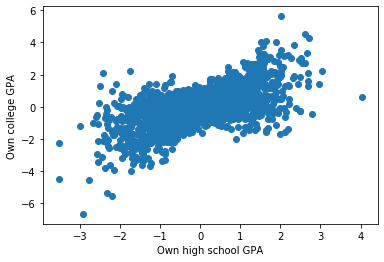

In [42]:
# [Answer to ex. 12.1.3 here]
plt.scatter(df['high_school_GPA'], df['college_GPA'])
plt.xlabel('Own high school GPA')
plt.ylabel('Own college GPA');

<br>
We want to check there is random assignment of roommates. 

> **Ex. 12.1.4:** Plot high school GPA vs roommate's high school GPA. Comment on the output. Run a regresion of high school GPA on roommate's high school GPA to formally check random assignment.
>
>> *Hint*: To run regressions in python, you can use the `statsmodels` package. Look up it's documentation and use the `.formula` api to estimate your model. To see a summary of a fitted model you can call `.summary()` on the object. 
>
>> *Hint:* Under random assignment we would expect there to be no relation between the high school GPA's of roommates. Why is this? 

**Answer:**

From the figure below, it seems that the assignment of roomates is random, at least with respect to high school GPA. It looks like this because there is no obvious systematic relationship between the high school GPAs of roommates, which there shouldn't be at random assignment, since the roommates haven't met, and thus haven't affected each other, in high school.



From the OLS regression results it is seen that neither the constant or the coefficient on the roommate's high school GPA are significantly different from zero. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        high_school_GPA   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.07263
Date:                Fri, 22 May 2020   Prob (F-statistic):              0.788
Time:                        17:54:02   Log-Likelihood:                -2883.6
No. Observations:                2000   AIC:                             5771.
Df Residuals:                    1998   BIC:                             5782.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0284      0.023     -1.241      0.215      -0.073       0.016
high_school_GPA_other    -0.0060      0.022     -0.269      0.788      -0.050       0.038
==============================================================================
Omnibus:                        0.231   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.891   Jarque-Bera (JB):                0.288
Skew:                           0.015   Prob(JB):                        0.866
Kurtosis:                       2.949   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

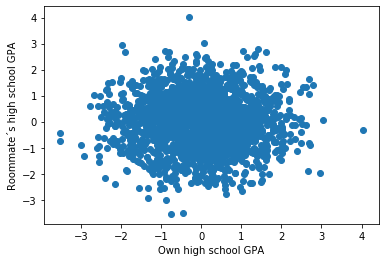

In [57]:
# [Answer to ex. 12.1.4 here]

# Plot high school GPA vs. roommate's high school GPA
plt.scatter(df['high_school_GPA'], df['high_school_GPA_other'])
plt.xlabel('Own high school GPA')
plt.ylabel('Roommate´s high school GPA');

# Regress high school GPA on rommies' high school GPA
y = df['high_school_GPA']
x = df['high_school_GPA_other']
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()
results.summary()

<br>
<br>

## Roommate effect

Having checked the data we move on to analyzing peer effects. We begin with analyzing **exogenous** peer effects. I.e. peer effects that are related to the ex ante characteristics of the roommate.

> **Ex. 12.1.5:** Plot own GPA in college vs. roommate GPA in high school. Comment on the output. Test whether there is an impact using a regresion of college school GPA on high school GPA for the person itself and its roommate.

**Answer:**

Neither the figure nor the OLS regression suggest there is any systematic relationship between own college GPA and rommate's high school GPA, i.e. no evidence of exogenous peer effects. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            college_GPA   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     671.3
Date:                Fri, 22 May 2020   Prob (F-statistic):          1.03e-223
Time:                        18:01:33   Log-Likelihood:                -2586.0
No. Observations:                2000   AIC:                             5178.
Df Residuals:                    1997   BIC:                             5195.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0226      0.020     -1.147      0.252      -0.061       0.016
high_school_GPA           0.7059      0.019     36.606      0.000       0.668       0.744
high_school_GPA_other     0.0356      0.019      1.847      0.065      -0.002       0.073
==============================================================================
Omnibus:                       77.587   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.025
Skew:                          -0.117   Prob(JB):                     5.52e-47
Kurtosis:                       4.582   Cond. No.                         1.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

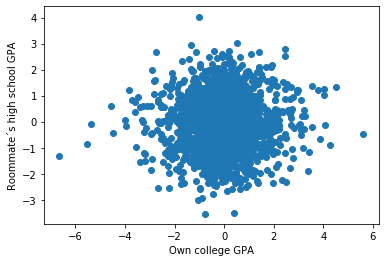

In [62]:
# [Answer to ex. 12.1.5 here]

# Plot college GPA vs. roomate's high school GPA
plt.scatter(df['college_GPA'], df['high_school_GPA_other'])
plt.xlabel('Own college GPA')
plt.ylabel('Roommate´s high school GPA');

# Regress high school GPA on rommies' and own high school GPA
y = df['college_GPA']
x = df[['high_school_GPA','high_school_GPA_other']]
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()
results.summary()

We now move on to analyze **endogenous** peer effects.

> **Ex. 12.1.6:** Test whether there is an association between own college GPA and roommates. Do this by running a regresion of college school GPA on high school GPA for the person itself and its roommate. Comment on the output.

Note: The exercise states that I should regress own college GPA on own high school GPA and rommies' high school GPA. I assume that I'm ment to regress own college GPA on own high school GPA and rommies' college GPA. 

**Answer:**

The regression results suggest that there are endogenous peer effects, since the college GPA of a student is (positively) correlated with the college GPA of his roommate when controlling for his own high school GPA. 

In [65]:
# [Answer to ex. 12.1.6 here]

# Regressing college GPA on own high school GPA and roommies' college GPA
y = df['college_GPA']
x = df[['high_school_GPA','college_GPA_other']]
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            college_GPA   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     680.4
Date:                Fri, 22 May 2020   Prob (F-statistic):          4.46e-226
Time:                        18:10:16   Log-Likelihood:                -2580.6
No. Observations:                2000   AIC:                             5167.
Df Residuals:                    1997   BIC:                             5184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0209      0.020     -1.059      0.290      -0.059       0.018
high_school_GPA       0.7036      0.019     36.574      0.000       0.666       0.741
college_GPA_other     0.0654      0.017      3.788      0.000       0.032       0.099
==============================================================================
Omnibus:                       78.932   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.446
Skew:                          -0.117   Prob(JB):                     2.23e-48
Kurtosis:                       4.606   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<br>
<br>

# 12.2 Peer effects in Danish classrooms

Read the [report by Kraka on peer effects in Danish schools](http://kraka.dk/sites/default/files/public/baggrundsnotat_klassekammerateffekter_0.pdf) from 2019. If you do not speak Danish talk to your group about the content.
> **Ex. 12.2.1:** Explain the identification strategy in words.

**Answer:**

The authors want to examine how the composition of pupils in a school grade (årgang på dansk) affects different outcomes of the students in the grade. They characterise the composition of a grade by how many of the pupils are "weak" and how many are "strong" in terms of resources from their families etc. 


The authors cannot just use compare a school with overweight of "strong" students with a school with overweight of "weak" students, since the result would be biased, as more resourceful families live in certain areas and so on. So, they use the variation across different years in the composition of pupils within a school to identify the peer effects. 

> **Ex. 12.2.2:** Are there any shortcomings of the identification strategy? What does the seminal paper [Hoxby (2000)](https://www.nber.org/papers/w78612.pdf) test for?

**Answer:**

Their results will be biased if there is selection in good/bad grades compared to the school's usual grades. An example of how this kind of selection would occur: If a child ends up in a grade with a "bad" composition of pupils, resourceful parents will move their child to a private school to a larger extent than not as resourceful parents would (badly formulated, hope it makes sense). 


Another problem would be if the variationen between years is generated by time trends, which is what Hoxby test for in her paper.  

> **Ex. 12.2.3:** Try to come up with identification strategies for identifying peer effects in the context of Danish class rooms.